In [1]:
import pandas as pd
import numpy as np
import warnings

#Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
import plotly.io as pio

import matplotlib.pyplot as plt
import seaborn as sns

#sklearn libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

pio.templates.default = "ggplot2"

#dataframe display settings
pd.set_option('display.max_columns', 5000000)
pd.set_option('display.max_rows', 50000000)

In [2]:
## Data from dataset 2
founders = pd.read_csv('data/dataset2.csv')

In [3]:
founders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Full Name                        18361 non-null  object
 1   Primary Job Title                18361 non-null  object
 2   Bio                              18361 non-null  object
 3   Gender                           18361 non-null  int64 
 4   Number of News Articles          18361 non-null  int64 
 5   Number of Founded Organizations  18361 non-null  int64 
 6   Number of Portfolio Companies    18361 non-null  int64 
 7   Number of Investments_x          18361 non-null  int64 
 8   Number of Partner Investments    18361 non-null  int64 
 9   Number of Lead Investments_x     18361 non-null  int64 
 10  Number of Exits_x                18361 non-null  int64 
 11  Number of Events_x               18361 non-null  int64 
 12  Categories                      

In [4]:
founders.columns

Index(['Full Name', 'Primary Job Title', 'Bio', 'Gender',
       'Number of News Articles', 'Number of Founded Organizations',
       'Number of Portfolio Companies', 'Number of Investments_x',
       'Number of Partner Investments', 'Number of Lead Investments_x',
       'Number of Exits_x', 'Number of Events_x', 'Categories',
       'Headquarters Location ', 'Operating Status', 'Founded Date',
       'Closed Date', 'Company Type', 'Number of Founders', 'Success',
       'Founder'],
      dtype='object')

In [14]:
founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                                                     'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                                                     'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                                                     'Operating Status', 'Founded Date', 'Closed Date', 
                                                     'Company Type', 'Number of Founders', 'Success',
                                                     'Founder' ]].corr(method='kendall')['Success'].T

Gender                             0.070425
Number of News Articles            0.258970
Number of Founded Organizations    0.008032
Number of Portfolio Companies      0.112315
Number of Investments_x            0.112183
Number of Partner Investments      0.048415
Number of Lead Investments_x       0.046066
Number of Exits_x                  0.094556
Number of Events_x                 0.103447
Operating Status                   0.002526
Founded Date                      -0.414337
Closed Date                       -0.000251
Company Type                      -0.077322
Number of Founders                 0.046880
Success                            1.000000
Founder                           -0.013238
Name: Success, dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler

standarizer = StandardScaler()

standarized_df = standarizer.fit_transform(founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                                                     'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                                                     'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                                                     'Operating Status', 'Founded Date', 'Closed Date', 
                                                     'Company Type', 'Number of Founders', 'Success',
                                                     'Founder' ]])

standarized_df = pd.DataFrame(standarized_df, columns=['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                                                     'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                                                     'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                                                     'Operating Status', 'Founded Date', 'Closed Date', 
                                                     'Company Type', 'Number of Founders', 'Success',
                                                     'Founder' ])

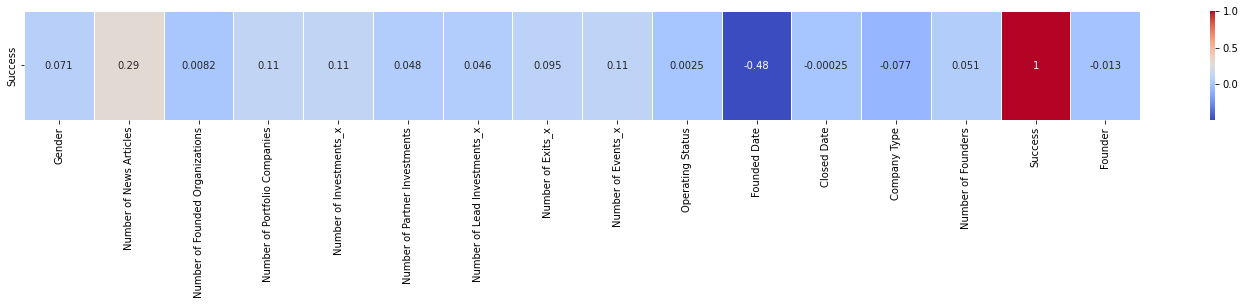

In [46]:
# Calculate the correlation matrix by Spearman
founders_df = founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                        'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                        'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                        'Operating Status', 'Founded Date', 'Closed Date', 
                        'Company Type', 'Number of Founders', 'Success',
                        'Founder' ]]
correlation_matrix_spearman = founders_df.corr(method='spearman')['Success'].to_frame().T

fig, ax = plt.subplots(figsize=(25,2))         # Sample figsize in inches
sns.heatmap(correlation_matrix_spearman, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

fig.tight_layout()

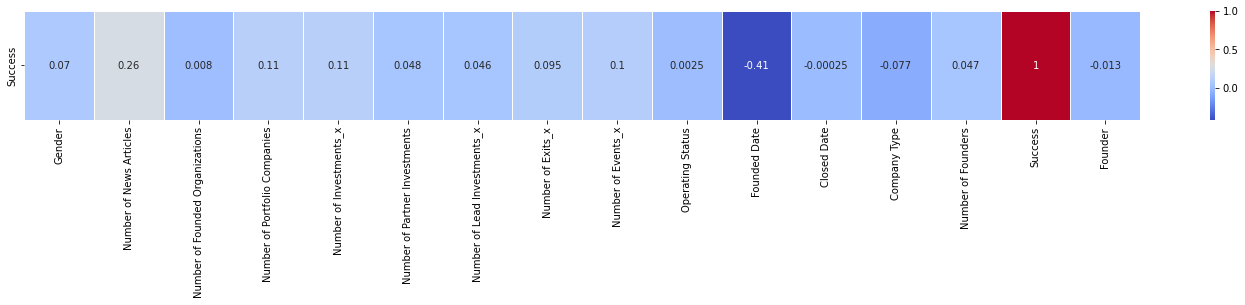

In [47]:
# Calculate the correlation matrix by kendall
founders_df = founders[['Gender', 'Number of News Articles', 'Number of Founded Organizations',
                        'Number of Portfolio Companies', 'Number of Investments_x', 'Number of Partner Investments', 
                        'Number of Lead Investments_x', 'Number of Exits_x', 'Number of Events_x', 
                        'Operating Status', 'Founded Date', 'Closed Date', 
                        'Company Type', 'Number of Founders', 'Success',
                        'Founder' ]]
correlation_matrix_kendall = founders_df.corr(method='kendall')['Success'].to_frame().T

fig, ax = plt.subplots(figsize=(25,2))         # Sample figsize in inches
sns.heatmap(correlation_matrix_kendall, annot=True, linewidths=.5, ax=ax, cmap="coolwarm")

fig.tight_layout()

In [54]:
#PrettyTable
from prettytable import PrettyTable
#we decide to keep those variables that have a bigger correaltion than the abs(0.1)
correlation_threshold = 0.1
attributes  = list(filter(lambda x: abs(float(founders_df.corr(method='spearman')['Success'].to_frame().T[x])) > correlation_threshold, founders_df.columns))
attributes.remove('Success')
corrTbl = PrettyTable()
corrTbl.field_names = ['Variables']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(f'The variables correlated by Spearman are \n {corrTbl}')

#we decide to keep those variables that have a bigger correaltion than the abs(0.1)
correlation_threshold = 0.1
attributes  = list(filter(lambda x: abs(float(founders_df.corr(method='kendall')['Success'].to_frame().T[x])) > correlation_threshold, founders_df.columns))
attributes.remove('Success')
corrTbl = PrettyTable()
corrTbl.field_names = ['Variables']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(f'The variables correlated by Kendall are \n{corrTbl}')


The variables correlated by Spearman are 
 +-------------------------------+
|           Variables           |
+-------------------------------+
|    Number of News Articles    |
| Number of Portfolio Companies |
|    Number of Investments_x    |
|       Number of Events_x      |
|          Founded Date         |
+-------------------------------+
The variables correlated by Kendall are 
+-------------------------------+
|           Variables           |
+-------------------------------+
|    Number of News Articles    |
| Number of Portfolio Companies |
|    Number of Investments_x    |
|       Number of Events_x      |
|          Founded Date         |
+-------------------------------+


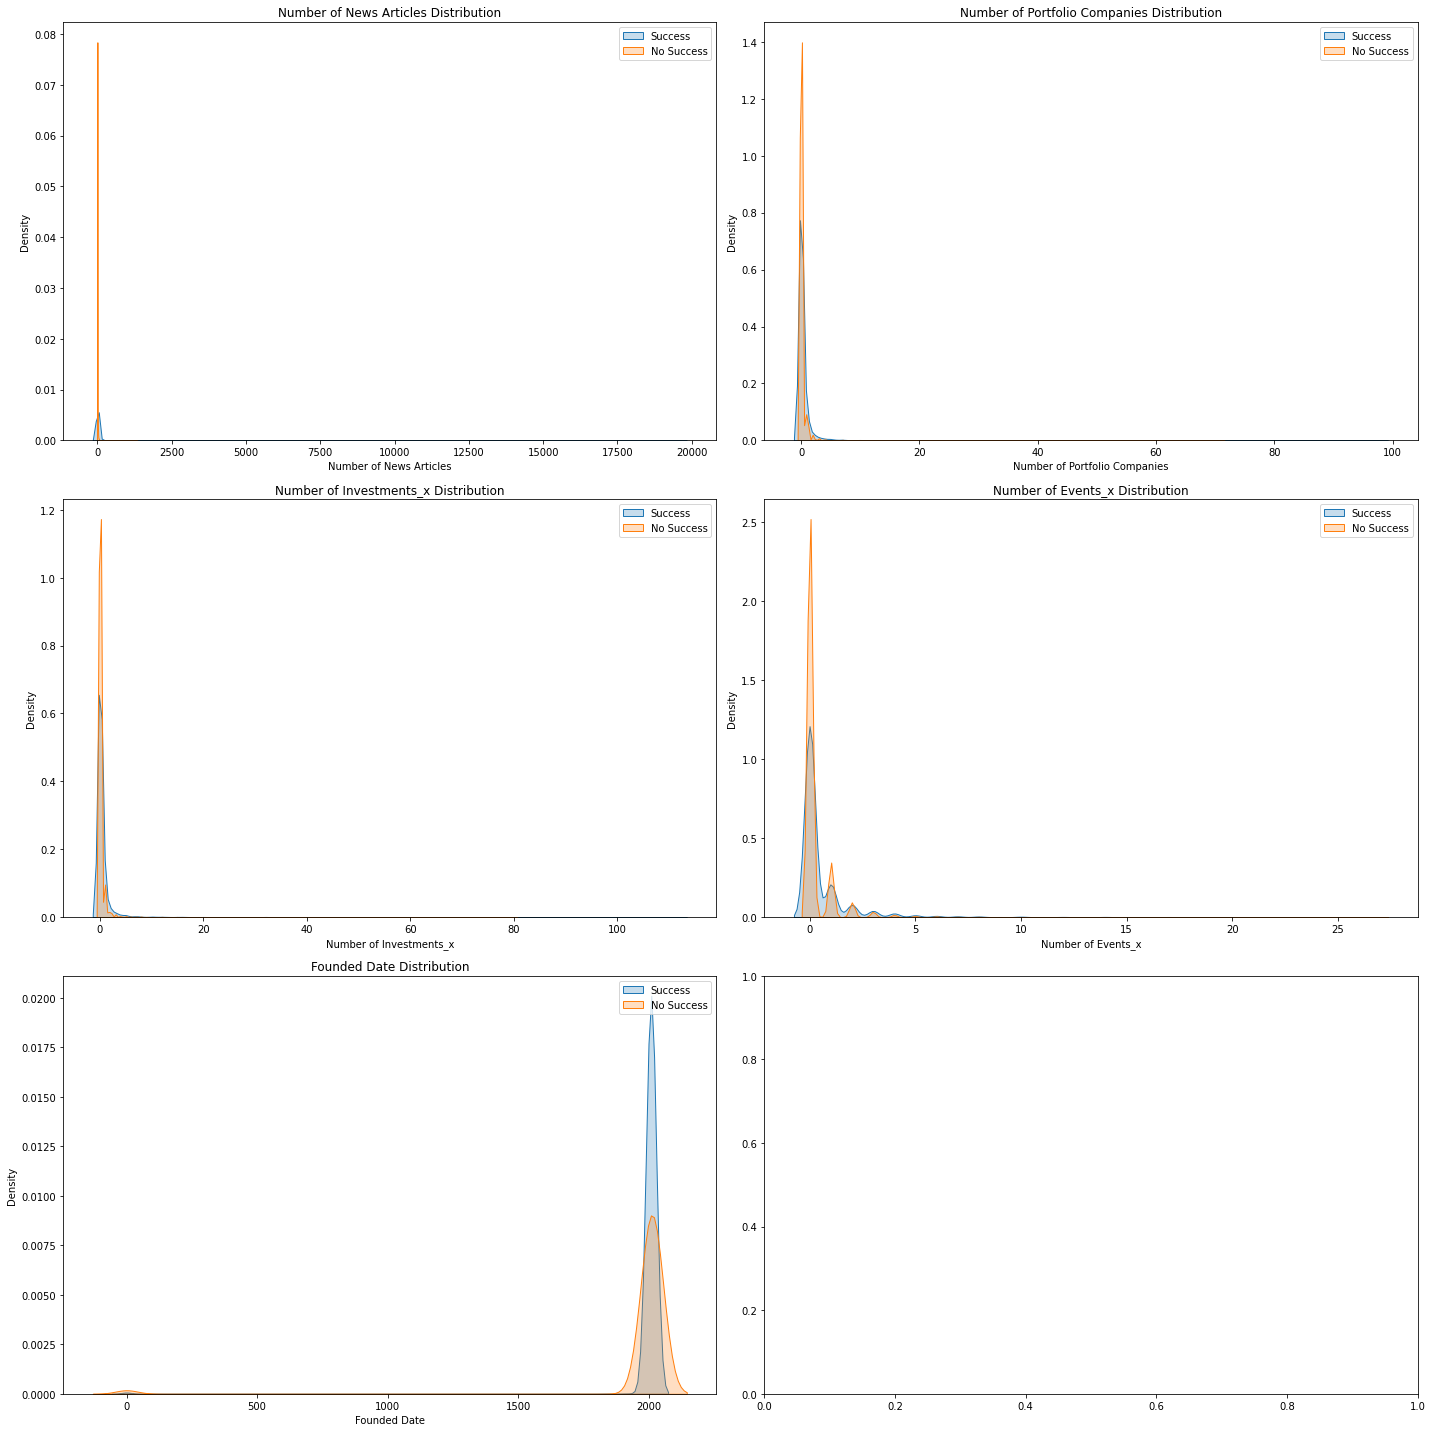

In [55]:
#we plot the distribution of those variables that are more correlated to our target
# Select only the rows where 'Success' is 1 (Success) and 0 (No Success)
success = founders_df[founders_df['Success'] == 1]
no_success = founders_df[founders_df['Success'] == 0]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 20))
ax = axes.ravel()

# Loop through the attributes and plot their distributions
for i in range(len(attributes)): 
    ax[i].set_title(f'{attributes[i]} Distribution')
    sns.distplot(success[attributes[i]], hist=False, kde_kws={'shade':True}, label="Success", ax=ax[i])
    sns.distplot(no_success[attributes[i]], hist=False, kde_kws={'shade': True}, label="No Success", ax=ax[i])
    ax[i].legend(["Success", "No Success"], loc="best")

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()

Total Number of Founders for each Class:
    Classe 0 (No Success): 11185
    Classe 1 (Success): 7176


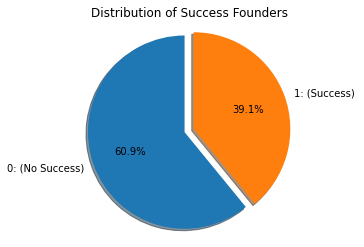

In [57]:
#we are plotting our data distribution to see if data is balanced or not
print(f"""Total Number of Founders for each Class:
    Classe 0 (No Success): {founders_df[founders_df['Success']==0].count()[0]}
    Classe 1 (Success): {founders_df[founders_df['Success']==1].count()[0]}""")
labels = "0: (No Success)", "1: (Success)"
total = len(founders_df)
no_success= founders_df[founders_df['Success']==0].count()[0]
success=founders_df[founders_df['Success']==1].count()[0]
sizes = [no_success/total, success/total]
explode = (0, 0.1)  # only "explode" the 2nd slice 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Success Founders")
plt.show()
#plt.savefig("number_of_samples_breakdown")

In [82]:
## Ananlysis from the academic backrounf pov:

#Data from academic background
degrees_df = pd.read_csv('data/degrees.csv')
people_df = pd.read_csv('data/people.csv')

## Data from dataset 2
founders = pd.read_csv('data/dataset2.csv')

In [83]:
# Merge people and degrees datasets on 'object_id'
backgrounds = pd.merge(people_df, degrees_df, on='object_id', how='left')
# Create 'Full Name' column
backgrounds['Full Name'] = backgrounds['first_name'] + ' ' + backgrounds['last_name']

# Merge with dataset2 on 'Full Name'
academic_founders = pd.merge(founders, backgrounds, on='Full Name', how='left')
academic_founders.head(5)



,Full Name,Primary Job Title,Bio,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Categories,Headquarters Location,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,Founder,id_x,object_id,first_name,last_name,birthplace,affiliation_name,id_y,degree_type,subject,institution,graduated_at,created_at,updated_at
0,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,0,1210.0,p:1392,Elon,Musk,NaN,zip2,1758.0,BA,"Economics, Physics",University of Pennsylvania,NaN,2008-10-15 21:23:31,2013-07-04 04:00:57
1,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,0,1210.0,p:1392,Elon,Musk,NaN,zip2,16161.0,Master Degree,Master Degree,Stanford University,NaN,2011-09-15 04:48:34,2013-07-04 04:01:38
2,Elon Musk,"Chairman, Product Architect & CEO",Elon co-founded Tesla and continues to oversee...,1,14445,7,11,21,0,9,6,2,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,0,1210.0,p:1392,Elon,Musk,NaN,zip2,48875.0,BS,Business,Wharton School,NaN,2013-07-04 04:01:27,2013-07-04 04:01:27
3,JB Straubel,Co-Founder and CTO,The story of JB Straubel's career started at a...,1,100,2,1,1,0,0,0,1,"Innovation Management, Automotive, Electronics",California,1,2003,0,1,4,1,1,3577.0,p:4305,JB,Straubel,NaN,Tesla Motors,46204.0,MS,"Engineering, Energy Systems",Stanford University,NaN,2013-06-24 01:30:01,2013-06-24 01:30:01
4,Mark Zuckerberg,Founder & CEO,Mark Zuckerberg is the founder and CEO of Face...,1,19678,10,6,7,0,0,0,5,"Social Media, Social, Social Network",California,1,2004,0,1,5,1,1,9.0,p:10,Mark,Zuckerberg,NaN,Facebook,2415.0,NaN,Computer Science,Harvard University,NaN,2009-03-24 22:50:22,2013-03-28 22:26:47


In [84]:
academic_founders.drop_duplicates(inplace=True)

In [85]:
academic_founders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21579 entries, 0 to 22933
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Full Name                        21579 non-null  object 
 1   Primary Job Title                21579 non-null  object 
 2   Bio                              21579 non-null  object 
 3   Gender                           21579 non-null  int64  
 4   Number of News Articles          21579 non-null  int64  
 5   Number of Founded Organizations  21579 non-null  int64  
 6   Number of Portfolio Companies    21579 non-null  int64  
 7   Number of Investments_x          21579 non-null  int64  
 8   Number of Partner Investments    21579 non-null  int64  
 9   Number of Lead Investments_x     21579 non-null  int64  
 10  Number of Exits_x                21579 non-null  int64  
 11  Number of Events_x               21579 non-null  int64  
 12  Categories        

In [86]:
academic_founders.describe()

,Gender,Number of News Articles,Number of Founded Organizations,Number of Portfolio Companies,Number of Investments_x,Number of Partner Investments,Number of Lead Investments_x,Number of Exits_x,Number of Events_x,Operating Status,Founded Date,Closed Date,Company Type,Number of Founders,Success,Founder,id_x,id_y
count,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,21579.000000,12801.000000,6920.000000
mean,0.920108,13.832152,1.361602,0.315955,0.346309,0.057417,0.009454,0.058297,0.412206,0.986885,1986.264794,18.082997,0.848556,2.410445,0.416979,0.922471,102084.228888,47509.363584
std,0.291558,226.353063,0.765407,1.929134,2.195862,1.278523,0.157618,0.530498,1.220792,0.113768,224.052725,189.860954,0.358489,1.174735,0.493071,0.267435,63922.875447,29829.078892
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,0.000000,1.000000,2.000000,0.000000,1.000000,48078.000000,21275.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2012.000000,0.000000,1.000000,2.000000,0.000000,1.000000,99274.000000,47357.000000
75%,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2014.000000,0.000000,1.000000,3.000000,1.000000,1.000000,156066.000000,67146.250000
max,2.000000,19678.000000,13.000000,98.000000,112.000000,103.000000,9.000000,37.000000,27.000000,1.000000,2017.000000,2017.000000,1.000000,11.000000,1.000000,1.000000,226700.000000,109578.000000


In [87]:
def categorize_degree(degree):
    if isinstance(degree, str):
        # Dictionary to map degree types to their general classification
        degree_types = {
            'High School': ['High School', 'H.S.C.', 'XIIth', 'Xth', 'Secondary Education', 'High-scool education', 'Bachiller'],
            'Bachelor': ['BA', 'B.A.', 'BS', 'B.S.', 'B. Tech', 'B.Tech', 'BE', 'B.E.', 'Bachelor', 'B', 'Baccalauréat',
                         'BFA', 'B.Sci.', 'B.Arch.', 'BIT', 'BCOM (Hons)',  'BGS', 'B.Sc. (Economics)', 'BCA', 'B.S',
                         'BBM', 'B.Com', 'B.Sc. Honours', 'Honours B.Sc', 'B.Sc. (Ma)', 'B.Comm', 'B'],
            'Masters': ['MA', 'M.A.', 'MS', 'M.S.', 'MSc', 'M.Sc.', 'MBA', 'M.B.A.', 'Master', 'Masters',
                        'M. Math', 'PMP', 'ME', 'MD', 'M.Tech'],
            'PhD': ['PhD', 'Ph.D.', 'Doctor', 'D.', 'Doctorate']
        }

        # Iterate through the degree types
        for category, types in degree_types.items():
            # Check if the degree is in the current category
            if any(type_ in degree for type_ in types):
                return category  # Return the category if found

    # If not found in any category, return the original degree
    return degree
academic_founders['degree_type'].fillna(' ')
academic_founders['degree_type'] = academic_founders['degree_type'].apply(categorize_degree)



In [88]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables: degree_type, subject, and institution
# One-hot encode 'degree_type'
degree_type_dummies = pd.get_dummies(academic_founders['degree_type'], prefix='degree_type')
academic_founders = pd.concat([academic_founders, degree_type_dummies], axis=1)

# Label encode 'subject' and 'institution' (assuming they have too many unique values)
label_encoder = LabelEncoder()
academic_founders['subject_encoded'] = label_encoder.fit_transform(academic_founders['subject'].astype(str))
academic_founders['institution_encoded'] = label_encoder.fit_transform(academic_founders['institution'].astype(str))



In [94]:
# Extract all the one-hot encoded degree_type columns
degree_type_cols = [col for col in academic_founders.columns if col.startswith('degree_type_')]

# Concatenate all academic background variables for correlation calculation
academic_background_variables = degree_type_cols + ['subject_encoded', 'institution_encoded', 'Success']
academic_corr = academic_founders[academic_background_variables]


In [96]:
correlation_threshold = 0.1
attributes  = list(filter(lambda x: abs(float(academic_corr.corr(method='spearman')['Success'].to_frame().T[x])) > correlation_threshold, academic_corr.columns))
attributes

['degree_type_Bachelor', 'subject_encoded', 'institution_encoded', 'Success']

In [97]:
#we decide to keep those variables that have a bigger correaltion than the abs(0.1)
attributes.remove('Success')
corrTbl = PrettyTable()
corrTbl.field_names = ['Variables']
for i in range(len(attributes)): 
    corrTbl.add_row([attributes[i]])
print(f'The variables correlated by Kendall are \n{corrTbl}')

The variables correlated by Kendall are 
+----------------------+
|      Variables       |
+----------------------+
| degree_type_Bachelor |
|   subject_encoded    |
| institution_encoded  |
+----------------------+


Correlation between 'degree_type_'A' Levels' and 'Success': -0.005757180143711159
Correlation between 'degree_type_'O' Levels' and 'Success': -0.005757180143711157
Correlation between 'degree_type_2:1' and 'Success': 0.00804968697355306
Correlation between 'degree_type_A Levels' and 'Success': -0.005757180143711153
Correlation between 'degree_type_A.I.M. Graduate' and 'Success': -0.005757180143711153
Correlation between 'degree_type_AA' and 'Success': -0.0020004227791539093
Correlation between 'degree_type_AAS' and 'Success': -0.004611247291927102
Correlation between 'degree_type_AAS-Grad' and 'Success': 0.008049686973553016
Correlation between 'degree_type_AISSCE' and 'Success': -0.005757180143711185
Correlation between 'degree_type_AOS' and 'Success': -0.0057571801437111695
Correlation between 'degree_type_AS' and 'Success': -0.00814207090847073
Correlation between 'degree_type_Accelerator' and 'Success': 0.008049686973553004
Correlation between 'degree_type_Account Hons.' and 'Succe

KeyError: 'subject_encoded'